In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats

from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

sns.set_style("white")

In [2]:
crime_feats = pd.read_csv('crime_features.csv')
crime_feats.head()

,city,population,Pop Squared,Robbery,Murder,Propertycrime,Burglary,Larceny
0,Adams Village,1861.000,3463321.000,0,0,12.000,2.000,10.000
1,Addison Town and Village,2577.000,6640929.000,0,0,24.000,3.000,20.000
2,Akron Village,2846.000,8099716.000,0,0,16.000,1.000,15.000
3,Albany,97956.000,9595377936.000,1,1,4090.000,705.000,3243.000
4,Albion Village,6388.000,40806544.000,1,0,223.000,53.000,165.000


In [3]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_feats['Propertycrime'].values.reshape(-1, 1)
X = crime_feats[['population', 'Pop Squared', 'Robbery', 'Murder', 'Burglary', 'Larceny']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.36999947e-04  3.45715947e-09 -2.80097469e-01  8.72111262e-01
   1.18158382e+00  9.86260711e-01]]

Intercept: 
 [-0.7178413]

R-squared:
0.9996865690866295


With population, poulation squared, robbery and murder this model explains 84.4% of variance in property crimes. From the coefficients it seems that property crime has the biggest per occurance increase when there are more murders.

## Check Assumptions

### Assumption One: Linear Relationship

Scatterplots

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


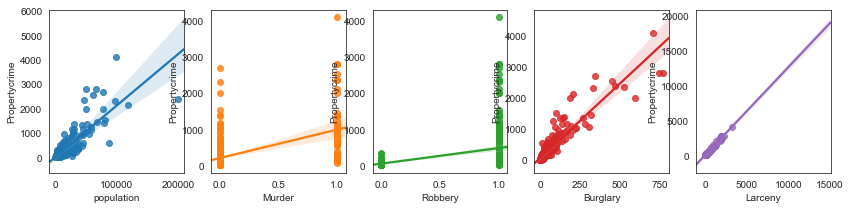

In [4]:
# Set variables
X_plot = ['population', 'Murder', 'Robbery', 'Burglary', 'Larceny']
Y_plot = 'Propertycrime'

# Define the scatterplot function
def plot_scat(frame, X, Y):
    fig, axes = plt.subplots(1, len(X), figsize=(14,3))
    for var in X:
        idx = X.index(var)
        sns.regplot(y=frame[Y], x=frame[var], ax=axes[idx])

plot_scat(crime_feats, X_plot, Y_plot)

### Assumption two: multivariate normality

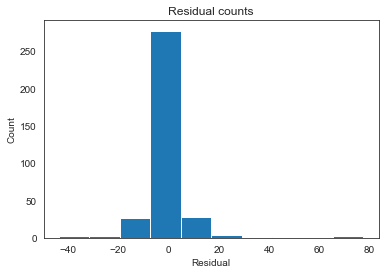

In [5]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = crime_feats['Propertycrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

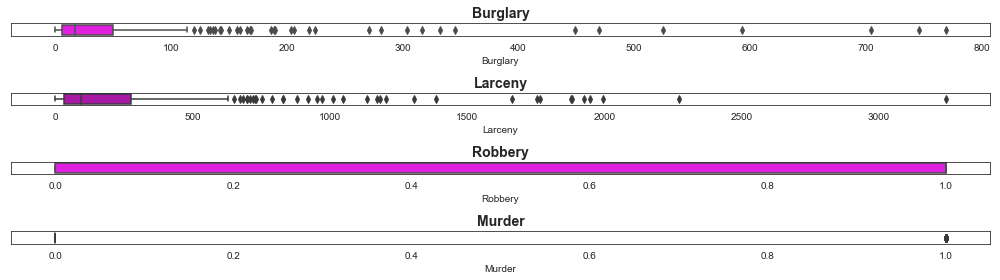

In [6]:
#plot to look for outliers without the NYC data
bug = crime_feats['Burglary']
lar = crime_feats['Larceny']
rob = crime_feats['Robbery']
mur = crime_feats['Murder']
fig, axes = plt.subplots(4, 1, sharex=False, figsize=(14,4))
# Burglary plot
sns.boxplot(bug, ax=axes[0], color='fuchsia').set_title('Burglary', fontsize=14, fontweight='bold')    
# Larceny plot
sns.boxplot(lar, ax=axes[1], color='m').set_title('Larceny', fontsize=14, fontweight='bold')
# Robbery plot
sns.boxplot(rob, ax=axes[2], color='fuchsia').set_title('Robbery', fontsize=14, fontweight='bold')    
# Murder plot
sns.boxplot(mur, ax=axes[3], color='m').set_title('Murder', fontsize=14, fontweight='bold')
    
plt.tight_layout()
plt.show()

In [7]:
crime_feats[(crime_feats["Burglary"] > 200) & (crime_feats["Larceny"] > 1200)][
    ["population", "Burglary", "Larceny"]]

,population,Burglary,Larceny
3,97956.000,705.000,3243.000
7,118296.000,204.000,1882.000
22,46304.000,525.000,1767.000
52,78361.000,345.000,2271.000
125,96667.000,332.000,1925.000
216,49574.000,746.000,1949.000
282,66041.000,769.000,1878.000
311,49898.000,593.000,1305.000
317,61686.000,449.000,1997.000
342,199134.000,470.000,1662.000


In [8]:
crime_feats[(residual > 60)][
    ["population", "Burglary", "Larceny"]]

,population,Burglary,Larceny
139,55198.000,206.000,630.000
205,68071.000,317.000,972.000


In [9]:
crime_feats = crime_feats.drop([3,7,22,52,125,216,282,311,317,342])
#crime_feats = crime_feats.drop([7])

In [10]:
# Windosirze to remove extreme outliers
crime_feats['burglary_wins'] = scipy.stats.mstats.winsorize(crime_feats['Burglary'], limits= 0.05)
crime_feats['larceny_wins'] = scipy.stats.mstats.winsorize(crime_feats['Larceny'], limits= 0.05)

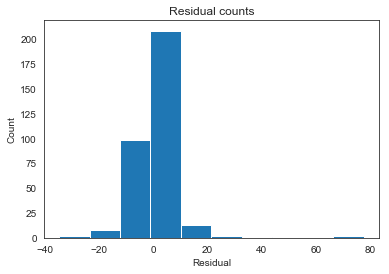

In [11]:
Y2 = crime_feats['Propertycrime'].values.reshape(-1, 1)
X2 = crime_feats[['population', 'Pop Squared', 'Robbery', 'Murder', 'Burglary', 'Larceny']]


# Extract predicted values.
predicted2 = regr.predict(X2).ravel()
actual2 = crime_feats['Propertycrime']

# Calculate the error, also called the residual.
residual2 = actual2 - predicted2

# This looks a bit concerning.
plt.hist(residual2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

The residual counts still seem to have an outlier

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


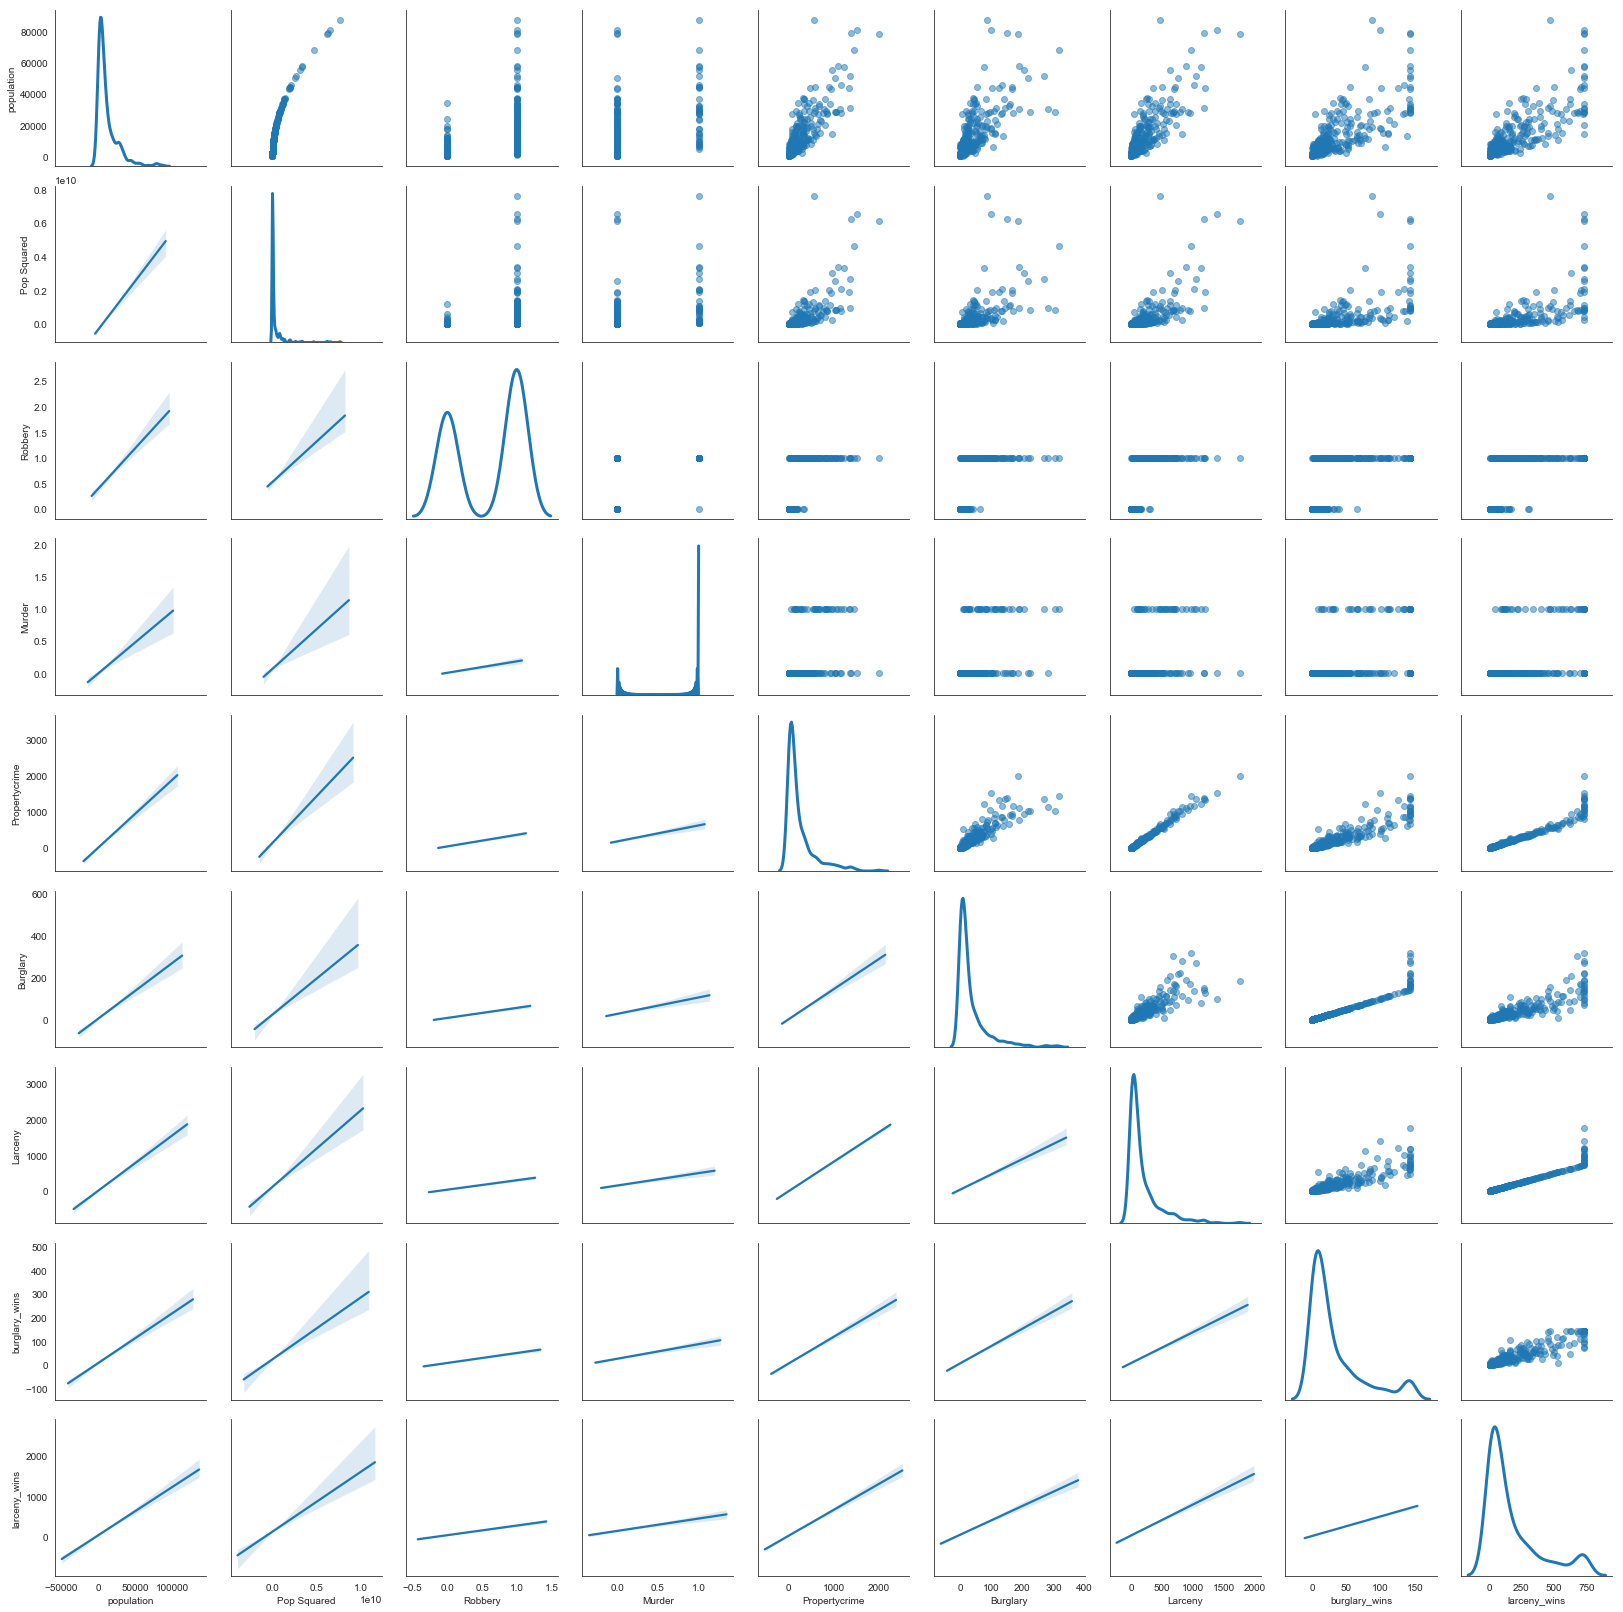

In [12]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(crime_feats.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Not sure how to address bimodal distribution (robbery).

There's no longer an outlier, but now the residual data is skewed

### Assumption three: homoscedasticity

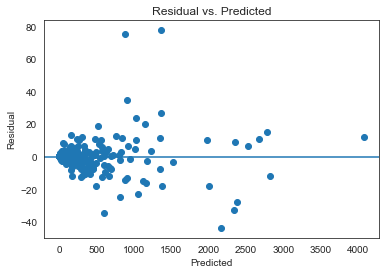

In [13]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

I'm going to transform the dependent variable (property crime)

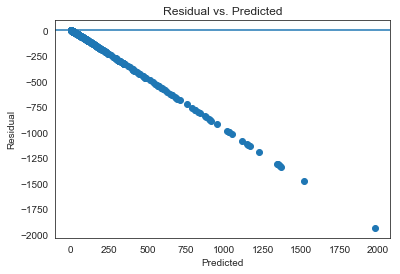

In [15]:
# take the square root of the property crime data then re-plot
prop_crm = crime_feats['Propertycrime']
crime_feats['sqrt_property'] = [math.sqrt(x) for x in  prop_crm]

X3 = crime_feats[['population', 'Pop Squared', 'Robbery', 'Murder', 'Burglary', 'Larceny']]

predicted3 = regr.predict(X3).ravel()
actual3 = crime_feats['sqrt_property']

# Calculate the error, also called the residual.
residual3 = actual3 - predicted3

#plot
plt.scatter(predicted3, residual3)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Now the error terms are distributed homoscedastically.

### Assumption four: low multicollinearity

Check for correlations

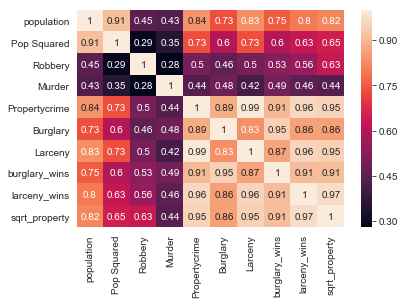

In [16]:
sns.heatmap(crime_feats.corr(), annot=True)
plt.show()

Population has the most correlation with property crime (more than population squared), so I'm going to perform

In [ ]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y4 = crime_feats['Propertycrime'].values.reshape(-1, 1)
X4 = crime_feats[['Pop Squared', 'Robbery', 'Murder']]
regr.fit(X4, Y4)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X4, Y4))